# ML Project

In [10]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [11]:
# Importing the dataset
dataset = pd.read_csv('data/train.csv')
dataset_test=pd.read_csv('data/test.csv')


# Missing data analysis and visualization

# Correlation matrix and scatter plot

In [12]:
# separate train and test data in to numerical data and categorica data
num_data=dataset.select_dtypes(exclude=['object'])
cat_data=dataset.select_dtypes(exclude=['number'])
num_data_test=dataset_test.select_dtypes(exclude=['object'])
cat_data_test=dataset_test.select_dtypes(exclude=['number'])
num_data.head()
#cat_data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


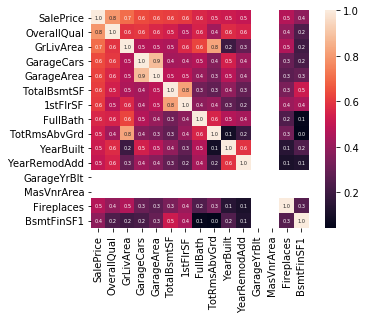

In [13]:
#correlation matrix
#largest columns of the correlation matrix
#most important corelated columns
corrmat = num_data.corr()
k = 15 #number of variables for heatmap
# largest columns of the sales price correlation matrix
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_data[cols].values.T) # correlation matric of the data table after taking transpose of the data table
#sns.set(font_scale=1.25)
hmap = sns.heatmap(cm, cbar=True, annot=True ,square=True, fmt='.1f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

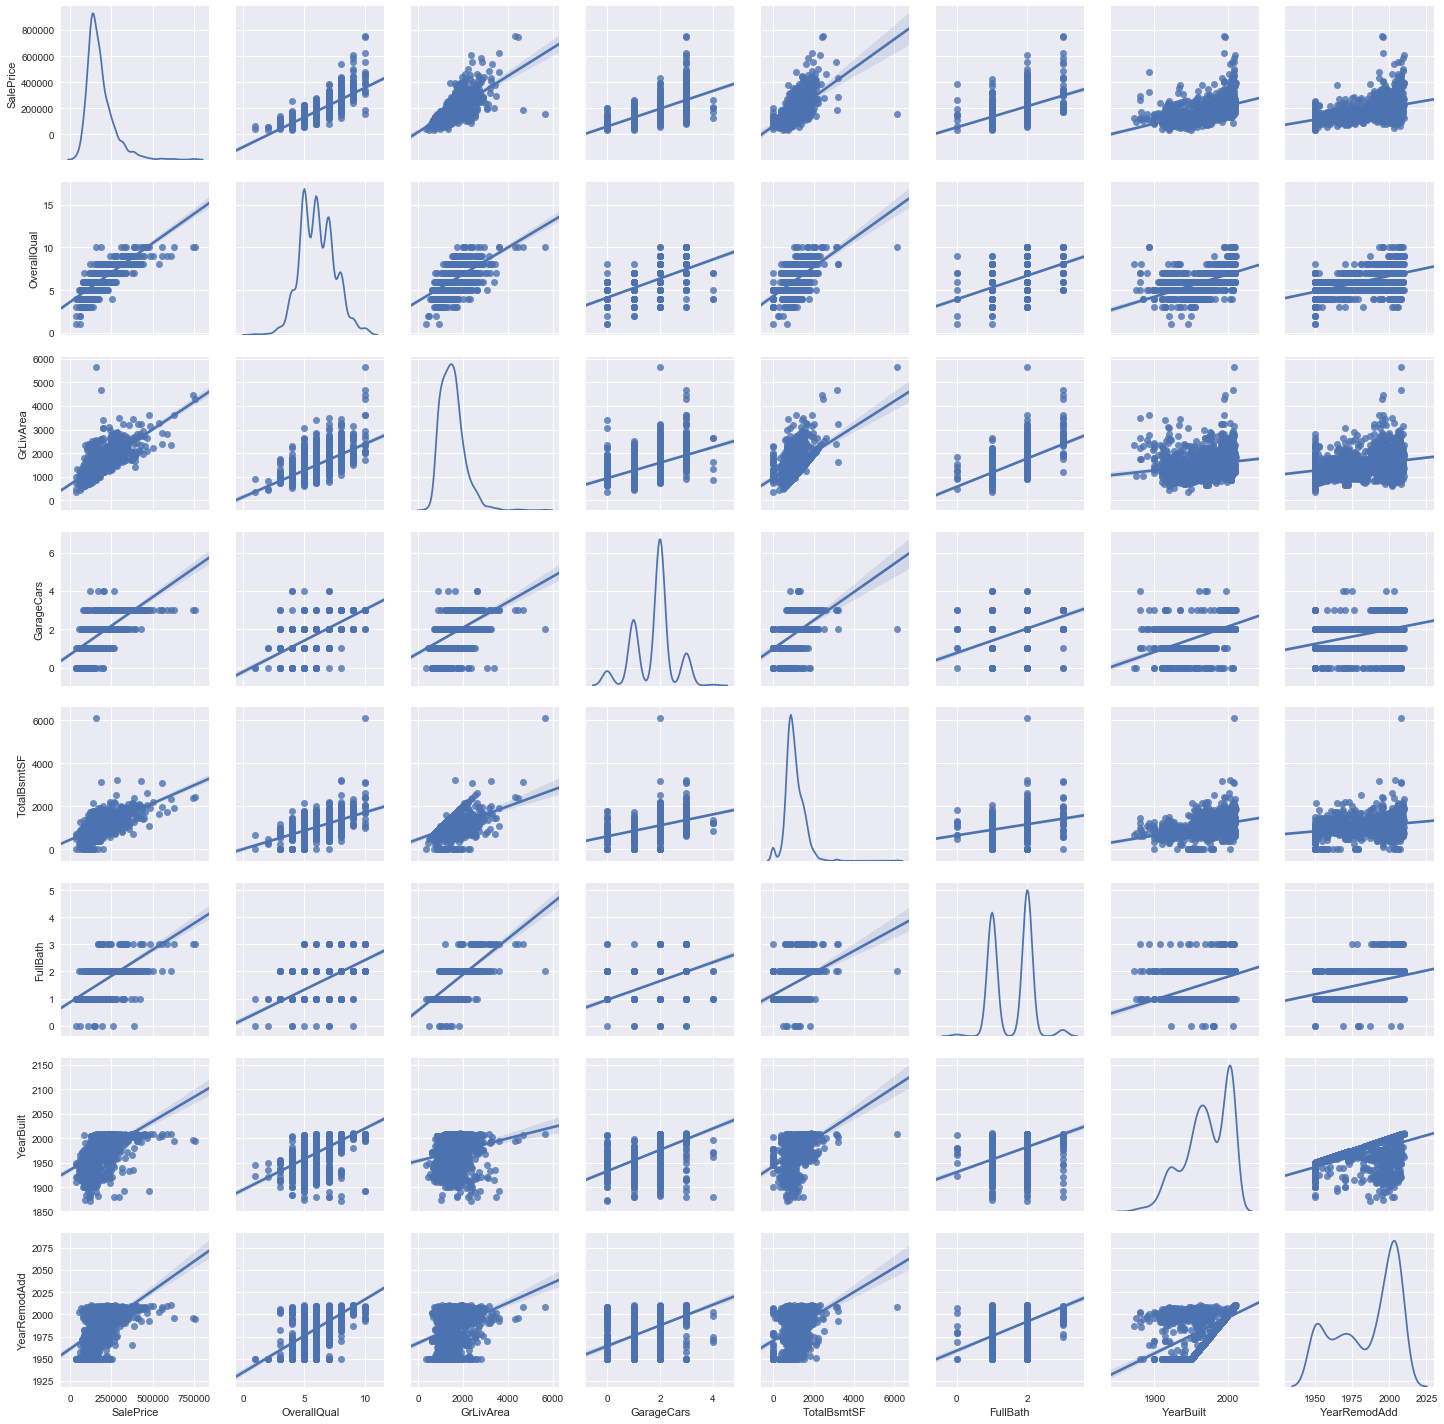

In [14]:
#scatterplots of top efeective varibles
sns.set()
colms = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
#sns.pairplot(num_data[colms], size = 2.5, hue="OverallQual", palette="husl", kind="reg", diag_kind="kde")
sns.pairplot(num_data[colms], size = 2.5, palette="Set3", kind="reg", diag_kind="kde")
plt.show();

# Following plots indicate me that there is Skewness in Salesprice, GrLiveArea,TotalBsmtSF, YearBuilt.
# we can normalised using log transform on above columns

# Cleaning the data

In [15]:
# check numerical columns missing data
num_data.isnull().sum().sort_values(ascending=False).head(5)

# check categorical columns mising values
cat_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [16]:
# imputing missing values as a average of the columns
# numerical columns only 
# num_data=num_data.fillna(num_data.mean())
# num_data.head(5)

#or

#following is other suggestion from Kaggle kernal
num_data['LotFrontage']=dataset.groupby(['Neighborhood'])["LotFrontage"].transform(lambda x: x.fillna(x.median()))
num_data["MasVnrArea"] = dataset['MasVnrArea'].fillna(0)
num_data["GarageYrBlt"] = dataset['GarageYrBlt'].fillna(0)
# you might need to GarageYrBlt column
num_data.isnull().sum().sort_values(ascending=False)

SalePrice        0
BsmtFinSF1       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
MasVnrArea       0
YrSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
MSSubClass       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
Id               0
dtype: int64

## function for data cleaning 

In [17]:
# This is better way to clean data for train and test both
# function to fill missing values 

def miss_clean(data):
    
    if 'SalePrice' in data.columns:
        data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
    
    #numerical missing columns
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median()))
    data['MasVnrArea'].fillna(0, inplace=True)
    data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)

    #categorical missing columns where missing is a category
    data['PoolQC'].fillna('None', inplace=True)
    data['MiscFeature'].fillna('None', inplace=True)
    data['Alley'].fillna('None', inplace=True)
    data['Fence'].fillna('None', inplace=True)
    data['FireplaceQu'].fillna('None', inplace=True)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        data[col] = data[col].fillna('None')
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[col] = data[col].fillna('None')
    
    #categorical missing columns by mode of the missings columns
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
    data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
    #data["Functional"] = data["Functional"].fillna("Typ")
    data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data[col] = data[col].fillna(0)

    #data.drop(['Utilities'], axis=1, inplace=True)
    # data["TotalSF"] = data["TotalBsmtSF"] + data["1stFlrSF"] + data["2ndFlrSF"]
    # data.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"], axis=1, inplace=True)
    
    return data


In [18]:
# function to convert numerical type to categorical data
# numerical columns are actually categorical and we need to convert it

def num_category(data):
    
    data['YrSold'] = data['YrSold'].astype('str')
    data['MoSold'] = data['MoSold'].astype('str')
    data['OverallQual'] = data['OverallQual'].astype('str')
    data['MSSubClass'] = data['MSSubClass'].astype('category')
    data['OverallCond'] = data['OverallCond'].astype('str')
    
    return data

In [19]:
# clean data
clean_data1=miss_clean(dataset)
clean_final=num_category(clean_data1)

clean_final.isnull().sum().sort_values(ascending=False).head(20)


SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

In [20]:
#dymmyfy categorical variables
X1=pd.get_dummies(clean_final)
# separating features and target
Y1=np.log1p(X1['SalePrice'])
X1.drop(['Id','SalePrice'],axis=1,inplace=True)


# Regression models

In [21]:
# importing library for differents models
from sklearn.linear_model import LinearRegression, Lasso,Ridge, LassoLarsIC, LassoCV, ElasticNet,BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import sklearn.model_selection as MS
import xgboost as xgb
#import lightgbm as lgb

In [22]:
# further split train and test data
# separating our train dataset into further train and test for cross valudation
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.2 , random_state = 0)


In [23]:
# function to calculate root mean square error with crossvalidation
# input is the specifi model and output is the rmse and r^2 values

n_folds = 10
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# function to calculate R^2 
def rsquare_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(X_train.values)
    rmse= np.sqrt(cross_val_score(model, X_train.values, y_train, cv = kf))
    return(rmse)

import re
def predictors_df(fitted_model,column_names=X1.columns): #returns a Pandas DataFrame holding predictors and coefficients
    results=pd.DataFrame(np.append(column_names,fitted_model.coef_).reshape(2,len(fitted_model.coef_))).transpose()
    results.columns = ['Predictor','Coefficient']
    results = results.sort_values(by='Coefficient',ascending=False)
    results.name = re.search(r'\w*',repr(fitted_model)).group(0)
    return results




In [24]:
#Ols model
ols = LinearRegression()
score=rmse_cv(ols) # score with cross validation
rsquare=rsquare_cv(ols)
#print('ols score(rmse) : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
#print('ols R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

ols.fit(X_train,y_train)

#TODO: on the best model, test normality of errors, independence of errors etc
#TODO: other various tests (leverage, outliers?)

## fit your linear model with fit() function
#ols.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#for i in range(len(X1.columns)):
    #print (X1.columns[i] + ': ' + str(ols.coef_[i]))
    
ols_betas = predictors_df(ols)

In [26]:
# lasso regression ( more consise way)
# ElasNet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=1))

lasso = Lasso(alpha =0.5, random_state=1)
#score=rmse_cv(lasso) # score with cross validation
rsquare=rsquare_cv(lasso)
print('lasso score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('lasso R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

lasso score : 0.13740 (0.01480)
lasso R^2 : 0.90635 (0.01992)


*TODO: CY: pass a grid of parameters to tune during cross-validation*<br>
See <a href="#tuning">below</a>. If we want to tune other parameters, we can turn the tuning_parameters into a list and add parameters.

*TODO: CY:  have lasso spit out predictors it keeps for various alpha*<br>
Done, in the form of a Pandas DF. See <a href="#predictors">below</a>.

<p><a name="tuning"></a></p>

Best RMSE: -0.010745148797795461
Best Parameters: {'alpha': 0.0001}
Average Time to Fit (sec): 0.052
Average Time to Score (sec): 0.001
[0.00620199 0.00860316 0.00978763 0.01056674 0.0111837  0.01175021
 0.01210788 0.01233597 0.01250129 0.012624   0.01265802 0.01270068
 0.01274854 0.01279993 0.01285465 0.01291246 0.01296305 0.01300797
 0.01304231 0.01304407 0.0130442  0.01304433 0.01304449 0.01304466
 0.01304485 0.01304504 0.01304524 0.01304544 0.01304565 0.01304588
 0.01304611 0.01304635 0.01304659 0.01304685 0.01304711 0.01304738
 0.01304767 0.01304796 0.01304825 0.01304855 0.01304885 0.01304922
 0.01304955 0.01304988 0.01305022 0.01305057 0.01305092 0.01305129
 0.01305166 0.01305204 0.01305243 0.01305282 0.01305322 0.01305363
 0.01305401 0.01305437 0.01305473 0.01305511 0.01305548 0.01305587
 0.01305626 0.01305666 0.01305706 0.01305748 0.01305789 0.01305832
 0.01305875 0.01305919 0.01305963 0.01306009 0.01306054 0.01306101
 0.01306148 0.01306196 0.01306244 0.01306293 0.01306343 0.01

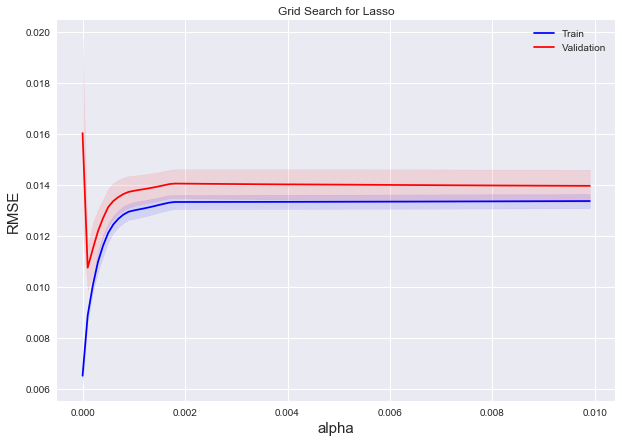

In [130]:
tuning_parameters = "[{'alpha': [.0001 * i for i in range(100)]}]"
lasso_tuning = bestModelFromGrid(model =Lasso(), 
                params = eval(tuning_parameters),
                X= X_train, y= np.log(y_train))
#lasso_tuning.fit(X_train, y_train)

#results = MS.cross_validate(estimator = lasso, X =X1, y =Y1, scoring ="neg_mean_squared_error", cv = n_folds)

In [91]:
from sklearn.metrics import make_scorer # insert RMSE as a custom scorer inside the rmseSimple
def rmseScore(y, y_pred, **kwargs):
    rmse = np.sqrt(np.mean((y-y_pred)**2))
    return(rmse)

rmseScorer = make_scorer(rmseScore, greater_is_better=False)    
def bestModelFromGrid(model, params, X, y):
    grid = MS.GridSearchCV(model, params, scoring=rmseScorer, error_score = 0, return_train_score=True)
    grid.fit(X, y)
    print("Best RMSE: {0}".format(grid.best_score_)) # Mean cross-validated score of the best_estimator
    print("Best Parameters: {0}".format(grid.best_params_))
    print("Average Time to Fit (sec): {0}".format(abs(round(grid.cv_results_['mean_fit_time'].mean(),3))))
    print("Average Time to Score (sec): {0}".format(round(grid.cv_results_['mean_score_time'].mean(),3)))
    
    plt.figure(figsize=(10,7))
    l1 = list(grid.param_grid[0].keys())
    paramName = l1[0] # assume we have only a one-parameter grid
    l2 = list(grid.param_grid[0].values())
    param_range = l2[0] # assume we have only a one-parameter grid
    
    cv_rmse = abs(grid.cv_results_['mean_train_score'])
    cv_std  = grid.cv_results_['std_train_score']
    train_y1  = cv_rmse - cv_std
    train_y2  = cv_rmse + cv_std
    print(train_y1)
    print(train_y2)
    plt.plot(param_range, cv_rmse, color='b')
    plt.fill_between(param_range, y1=train_y1, y2=train_y2, color='b', alpha=0.1)

    cv_rmse = abs(grid.cv_results_['mean_test_score'])
    cv_std  = grid.cv_results_['std_test_score']
    test_y1  = cv_rmse - cv_std
    test_y2  = cv_rmse + cv_std
    plt.plot(param_range, cv_rmse, color='r')
    plt.fill_between(param_range, y1=test_y1, y2=test_y2, color='r', alpha=0.1)

    plt.xlabel(paramName, fontsize=15)
    plt.ylabel('RMSE', fontsize=15)
    plt.title('Grid Search for {0}'.format(model.__class__.__name__))
    plt.legend(('Train','Validation'),loc='upper right')
    plt.show()   
    return(grid) # return the whole scored grid, we pick later what we need

In [133]:
import time
def log_search(model, param_name, central_point, search_radius, X, y,splitting_factor=3, allotted_minutes = 1,
               tolerance=1e-3,prev_error=None, requirements=None):
    allotted_seconds = allotted_minutes * 60
    step = search_radius*2/splitting_factor
    start_point = central_point - search_radius
    
    if requirements:
        if 'int' in requirements:
            step = int(step)
            start_point = int(start_point)
            central_point = int(central_point)
        if 'pos' in requirements and start_point <= 0:
            start_point = 1
    
    start_time = time.time()
    params = [dict([(param_name,[start_point + i * step for i in range(splitting_factor)] )])]
    result = bestModelFromGrid(model, params,X,y)
    seconds_elapsed = time.time() - start_time
    if seconds_elapsed >=allotted_seconds/2 or (prev_error and abs(prev_error -result.best_score_) < tolerance):
        return (result)
    else:
        
        return (log_search(model=model, param_name=param_name, central_point = result.best_params_[param_name], 
                           search_radius=(search_radius/splitting_factor), splitting_factor=splitting_factor, 
                           allotted_minutes=allotted_minutes-seconds_elapsed/60,X=X, y=y,
                          tolerance=tolerance, prev_error=result.best_score_,requirements=requirements))

Best RMSE: -0.010582268514043194
Best Parameters: {'alpha': 5.000000000000002e-05}
Average Time to Fit (sec): 0.064
Average Time to Score (sec): 0.002
[0.20069426 0.17505994 0.15116872 0.13543957 0.12260077 0.09579466
 0.07927179 0.0577643  0.04017122 0.0225231  0.00620199 0.00777289
 0.00860316 0.00923182 0.00978763 0.01023493 0.01056674 0.01086802
 0.0111837  0.01148039 0.01175021 0.01196851 0.01210788 0.0122243
 0.01233597 0.01243569 0.01250129 0.01256945 0.012624   0.01263986
 0.01265802 0.01267811 0.01270068 0.01272416 0.01274854 0.01277381
 0.01279993 0.01282688 0.01285465 0.01288319]
[0.23729082 0.22295074 0.19345424 0.17537249 0.14748554 0.12392776
 0.10122112 0.07465066 0.05060893 0.02592092 0.00681116 0.00829072
 0.00914702 0.00977947 0.01031046 0.0108647  0.01136786 0.01173401
 0.01203162 0.01225086 0.01246937 0.01264289 0.01277647 0.01289806
 0.01299712 0.01308422 0.01316172 0.01321968 0.013259   0.01329439
 0.01332251 0.01334567 0.01336059 0.01337627 0.01339271 0.01340994


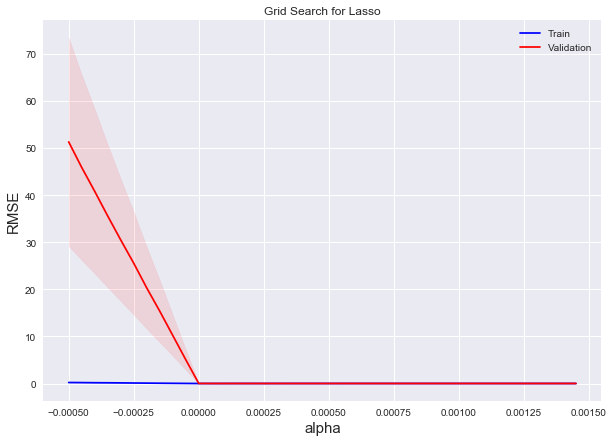

Best RMSE: -0.004321284637454355
Best Parameters: {'alpha': 2.500000000000002e-05}
Average Time to Fit (sec): 0.032
Average Time to Score (sec): 0.001
[0.00324672 0.00326931 0.00329253 0.00331568 0.00333705 0.00335643
 0.00337569 0.00339512 0.0034146  0.00343432 0.00345351 0.00347268
 0.00349166 0.00351008 0.0035271  0.00354409 0.00356079 0.00357737
 0.0035938  0.00361018 0.00362642 0.00364186 0.00365717 0.0036723
 0.00368667 0.003701   0.00371529 0.00372932 0.00374352 0.00375781
 0.00377221 0.0037863  0.00380021 0.00381407 0.00382762 0.00384128
 0.00385493 0.00386875 0.00388276 0.00389691]
[0.00345918 0.0034821  0.00350399 0.00352538 0.00354714 0.00356893
 0.0035909  0.00361074 0.00363015 0.00364968 0.0036693  0.00368859
 0.00370823 0.00372689 0.00374465 0.00376221 0.00377989 0.00379704
 0.00381402 0.00383078 0.00384686 0.00386277 0.00387788 0.00389229
 0.00390622 0.00392047 0.00393452 0.00394739 0.00396005 0.00397286
 0.00398584 0.00399875 0.00401171 0.00402489 0.00403819 0.00405141


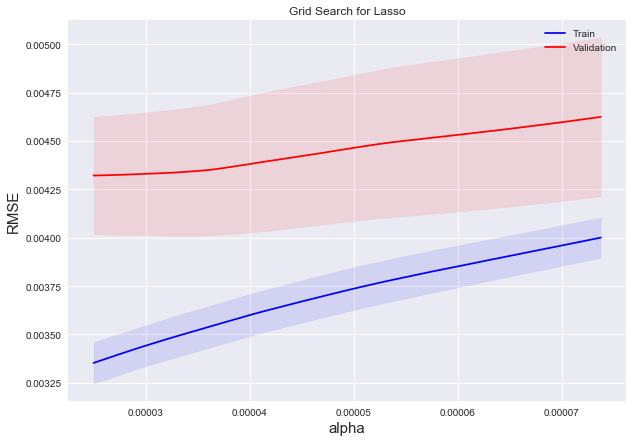

Best RMSE: -0.004831509967845357
Best Parameters: {'alpha': 2.521875000000002e-05}
Average Time to Fit (sec): 0.048
Average Time to Score (sec): 0.001
[0.00355472 0.00355525 0.00355578 0.00355631 0.00355684 0.00355737
 0.0035579  0.00355844 0.00355897 0.0035595  0.00356003 0.00356057
 0.0035611  0.00356164 0.00356217 0.00356271 0.00356324 0.00356378
 0.00356432 0.00356485 0.00356539 0.00356593 0.00356647 0.00356701
 0.00356754 0.00356808 0.00356862 0.00356916 0.0035697  0.00357024
 0.00357078 0.00357132 0.00357186 0.00357241 0.00357295 0.00357349
 0.00357403 0.00357458 0.00357512 0.00357566]
[0.00377381 0.00377448 0.00377515 0.00377582 0.00377649 0.00377716
 0.00377783 0.0037785  0.00377917 0.00377985 0.00378052 0.0037812
 0.00378187 0.00378255 0.00378323 0.0037839  0.00378458 0.00378526
 0.00378594 0.00378662 0.0037873  0.00378798 0.00378867 0.00378935
 0.00379003 0.00379072 0.00379141 0.00379209 0.00379277 0.00379345
 0.00379414 0.00379482 0.0037955  0.00379618 0.00379687 0.00379756


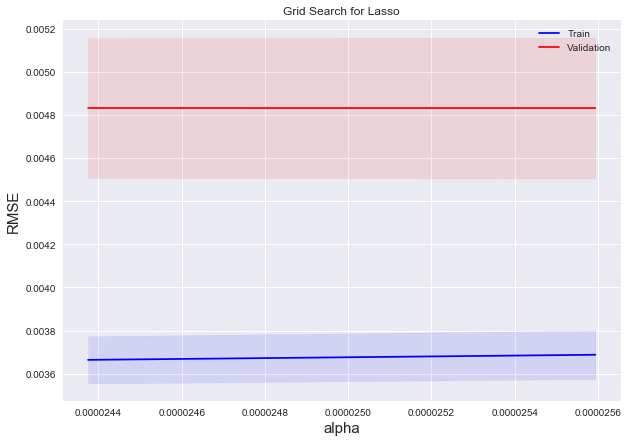

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [132]:
log_search(Lasso(),'alpha', .0005, search_radius = .001, X= X_train,y=np.log(y_train),splitting_factor=40,allotted_minutes=10)

In [126]:
print("Range of parameters tested:")
print(tuning_parameters)
print("Best parameters set found on development set:")
print()
print(lasso_tuning.best_params_)
print()
print("Grid scores on development set: See next cell")
print()
lasso_tuning.best_score_

Range of parameters tested:
[{'alpha': [.0001 * i for i in range(100)]}]
Best parameters set found on development set:

{'alpha': 0.0006000000000000001}

Grid scores on development set: See next cell



-0.015186198712677713

Best RMSE: -0.011715551382068689
Best Parameters: {'n_estimators': 1333}
Average Time to Fit (sec): 6.393
Average Time to Score (sec): 0.009
[0.03090666 0.00054877 0.00031609]
[0.03225395 0.00068748 0.0003162 ]


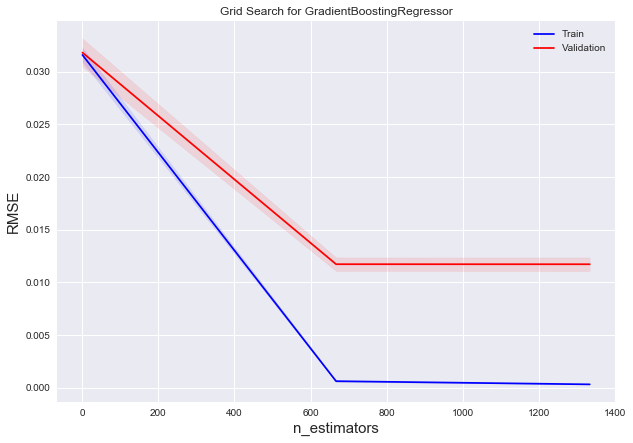

Best RMSE: -0.011694550658830136
Best Parameters: {'n_estimators': 999}
Average Time to Fit (sec): 10.413
Average Time to Score (sec): 0.013
[0.00031181 0.00031609 0.00031609]
[0.00035325 0.0003162  0.0003162 ]


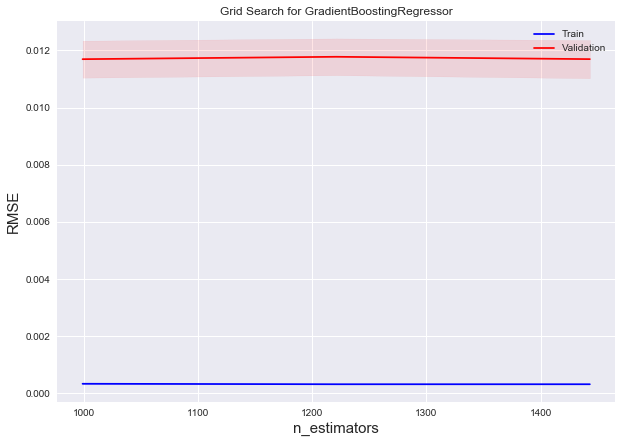

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 2000, max_depth = 5, learning_rate = 0.05) 
grid1= log_search(model=model, param_name = 'n_estimators', central_point=1000,search_radius=1000,
                  X=X_train, y=np.log(y_train),allotted_minutes= 5, tolerance=1e-3, requirements = ['int','pos']) #choose 1000

<a name="predictors"></a>

In [25]:
lasso = Lasso(alpha = lasso_tuning.best_params_['alpha'],random_state=1)
lasso.fit(X_train,y_train)
lasso_betas = predictors_df(lasso)
lasso_betas

,Predictor,Coefficient
138,OverallQual_9,0.114278
80,Neighborhood_Crawfor,0.108928
268,Functional_Typ,0.0854556
130,OverallQual_10,0.0819493
96,Neighborhood_StoneBr,0.074781
137,OverallQual_8,0.0688797
258,KitchenQual_Ex,0.0687745
147,OverallCond_9,0.0646264
297,GarageCond_TA,0.0442195
164,Exterior1st_BrkFace,0.0431263


In [26]:
lasso_betas.merge(ols_betas, on = 'Predictor',suffixes=(lasso_betas.name,ols_betas.name))
pd.concat([ols_betas,lasso_betas],axis=1)
#lasso_betas
#ols_betas

,Predictor,Coefficient,Predictor,Coefficient
0,LotFrontage,0.000452776,LotFrontage,0.000443667
1,LotArea,2.78745e-06,LotArea,1.76532e-06
2,YearBuilt,0.00154729,YearBuilt,0.00159208
3,YearRemodAdd,0.000890992,YearRemodAdd,0.00127953
4,MasVnrArea,1.23043e-05,MasVnrArea,3.84392e-05
5,BsmtFinSF1,5.58718e-05,BsmtFinSF1,0.000121282
6,BsmtFinSF2,3.43862e-05,BsmtFinSF2,0.00010677
7,BsmtUnfSF,6.84001e-06,BsmtUnfSF,6.14505e-05
8,TotalBsmtSF,9.70967e-05,TotalBsmtSF,4.4277e-05
9,1stFlrSF,5.34417e-05,1stFlrSF,0.000222714


In [27]:
#ridge regression
ridg=Ridge(alpha =5, random_state=1)
score=rmse_cv(ridg) # score with cross validation
rsquare=rsquare_cv(ridg)
print('Ridge score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Ridge R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

#TODO: CY: pass a grid of parameters to tune during cross-validation
#TODO: CY: have lasso spit out predictors it keeps for various alpha



Ridge score : 0.11945 (0.01511)
Ridge R^2 : 0.95241 (0.00949)


In [28]:
pd.get_dummies(clean_final).columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=349)

In [29]:
#elastic net regression
ENet=ElasticNet(alpha=0.5, random_state=1)
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score=rmse_cv(ENet) # score with cross validation
rsquare=rsquare_cv(ENet)
print('Elastic Net score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Elastic Net R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

# TODO: CY: do we need this mixture of Lasso and Ridge ? We may decide not to do it, because we have one more param to fit. 


Elastic Net score : 0.16318 (0.01841)
Elastic Net R^2 : 0.90863 (0.01907)


In [30]:
Rand_For=RandomForestRegressor()
score=rmse_cv(Rand_For) # score with cross validation
rsquare=rsquare_cv(Rand_For)
print('Random Forest score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Random Forest R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

#TODO: Marius + Akshay: Random Forest
#TODO: Marius + Akshay: Bagging
#TODO: Marius + Akshay: Boost

Random Forest score : 0.15278 (0.01872)
Random Forest R^2 : 0.91698 (0.01776)


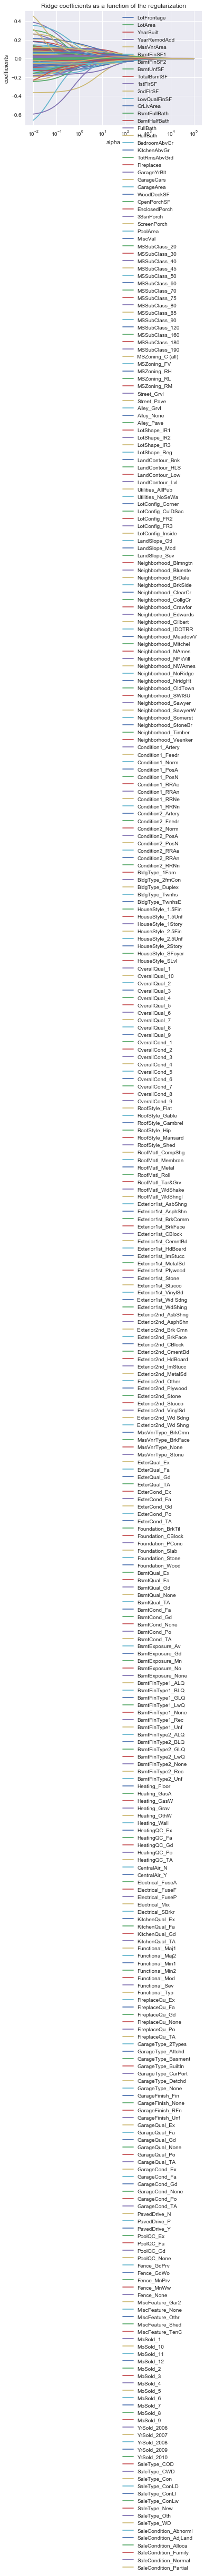

In [31]:
# ridge plots

from sklearn import datasets
iris = datasets.load_iris()
# use the first three variables to predict the fourth variable
iris.x = iris.data[:, :3]
iris.y = iris.data[:, 3]

from sklearn import linear_model
ridge = linear_model.Ridge()

alpha_100 = np.logspace(-2, 5, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X1, Y1)
    coef.append(ridge.coef_)

columns = X1.columns
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [32]:
df_coef

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0.010000,0.000387,0.000003,0.001868,0.000873,0.000012,0.000059,0.000043,-3.608814e-07,0.000102,0.000079,...,-1.062827e-02,0.027287,0.026586,-0.053129,-0.042407,6.626005e-02,-0.003754,-0.020147,0.018926,-0.018878
0.011768,0.000387,0.000003,0.001868,0.000872,0.000012,0.000059,0.000043,-4.157972e-07,0.000102,0.000079,...,-1.062720e-02,0.027585,0.026802,-0.053262,-0.042437,6.622539e-02,-0.003288,-0.020173,0.018950,-0.019277
0.013849,0.000387,0.000003,0.001868,0.000870,0.000012,0.000059,0.000043,-4.760435e-07,0.000102,0.000079,...,-1.062658e-02,0.027920,0.027042,-0.053410,-0.042472,6.619597e-02,-0.002779,-0.020202,0.018978,-0.019721
0.016298,0.000387,0.000003,0.001868,0.000868,0.000012,0.000059,0.000043,-5.423164e-07,0.000102,0.000079,...,-1.062649e-02,0.028293,0.027305,-0.053573,-0.042510,6.617459e-02,-0.002227,-0.020235,0.019011,-0.020213
0.019179,0.000387,0.000003,0.001868,0.000866,0.000012,0.000059,0.000043,-6.139297e-07,0.000102,0.000079,...,-1.062695e-02,0.028706,0.027592,-0.053752,-0.042554,6.616444e-02,-0.001634,-0.020272,0.019050,-0.020755
0.022570,0.000388,0.000003,0.001868,0.000864,0.000012,0.000059,0.000043,-6.911771e-07,0.000101,0.000079,...,-1.062790e-02,0.029162,0.027901,-0.053947,-0.042603,6.616903e-02,-0.001004,-0.020312,0.019095,-0.021345
0.026561,0.000388,0.000003,0.001868,0.000862,0.000012,0.000059,0.000043,-7.732869e-07,0.000101,0.000079,...,-1.062915e-02,0.029660,0.028230,-0.054158,-0.042658,6.619204e-02,-0.000339,-0.020356,0.019147,-0.021986
0.031257,0.000388,0.000003,0.001867,0.000860,0.000012,0.000059,0.000043,-8.605504e-07,0.000101,0.000079,...,-1.063031e-02,0.030201,0.028577,-0.054385,-0.042721,6.623700e-02,0.000355,-0.020404,0.019208,-0.022675
0.036784,0.000389,0.000003,0.001867,0.000857,0.000012,0.000059,0.000043,-9.522777e-07,0.000101,0.000079,...,-1.063075e-02,0.030784,0.028937,-0.054626,-0.042792,6.630707e-02,0.001073,-0.020456,0.019278,-0.023410
0.043288,0.000390,0.000003,0.001867,0.000855,0.000012,0.000058,0.000043,-1.047521e-06,0.000100,0.000080,...,-1.062951e-02,0.031408,0.029307,-0.054881,-0.042872,6.640463e-02,0.001809,-0.020512,0.019358,-0.024188


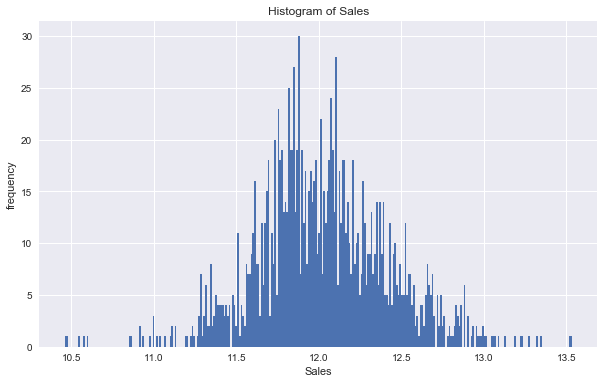

In [33]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('Sales',)
plt.title('Histogram of Sales')
Y1.hist(bins=300)
plt.show()

In [34]:
fig = plt.figure(figsize=(15, 9))
#sns.boxplot(y=Y1, x=X['OverallQual'])
sns.boxplot(y=Y1, x=X['GrLivArea'])


plt.show()

NameError: name 'X' is not defined

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

# Model building

In [ ]:
# dividing feature and target variables from numerical data only
X = num_data.iloc[:, :-1] # features
y = num_data.iloc[:, -1] # targets
X.head(5)

In [ ]:
# looking target variables ( sales price)
X1=X
y.describe()
sns.distplot(y)

# building simple regression model

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2 , random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [ ]:

# measure R^2,RSS score
regressor.score(X_train,y_train)
print('R^2', regressor.score(X_test,y_test))
print("RSS: %.2f" % np.sum((y_test - regressor.predict(X_test))**2))
print(sum(abs(y_test - regressor.predict(X_test)))/292)
print(sqrt(np.sum(y_test - regressor.predict(X_test))**2)/292)



In [ ]:
#### multiple linear regression fit with ols

from math import sqrt
from sklearn import linear_model
ols = linear_model.LinearRegression()

ols.fit(X_train,y_train)

print("R^2: %.5f" % ols.score(X_train, y_train))
print("RSS: %.2f" % np.sum((ols.predict(X_train) - y_train) ** 2))
print(sqrt(np.sum((ols.predict(X_train) - y_train) ** 2))/292)


In [ ]:
# visualization of prediction
plt.scatter(y_train,ols.predict(X_train), c=['r','b'])

In [ ]:
# Building the optimal model using Backward Elimination
# insert identity column in train data frame 
import statsmodels.formula.api as sm
X2 = np.append(arr = np.ones((1460, 1)).astype(int), values = X1, axis = 1)
#X_opt = X2[:, [0, 1, 2, 3, 4, 5]]
X_opt = X2[:, list(range(0,X1.shape[1]))]
X_opt

In [ ]:
# regression model

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


In [ ]:

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X2[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())


In [ ]:
# Backward elimination method using loop
# Backward elimination with p-values

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05

X_opt = X2[:, list(range(0,X1.shape[1]))]

X_Modeled = backwardElimination(X_opt, SL)



In [ ]:
#Backward elimination with p-values and adjusted R squared

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((1460,37)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        adjR_before = regressor_OLS.rsquared_adj
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.0005
X_opt = X2[:, list(range(0,X1.shape[1]))]

X_Modeled = backwardElimination(X_opt, SL)



In [ ]:
from  statsmodels.genmod import generalized_linear_model
glm = generalized_linear_model.GLM(y, X2)
# family = sm.families.Binomial() for logistic regression

In [ ]:
result = glm.fit()
result.summary()


In [ ]:
y_train.values.size
y_pred.size
y_test.size

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
y_train.values
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
sns.distplot((y_test-y_pred),bins=50);

In [ ]:
# visualization of prediction
plt.scatter(y_test,y_pred, c=['r','b'])

# SVR regression

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scale = sc_X.fit_transform(X1)
y_scale = sc_y.fit_transform([y])

X_scale
y_scale
X1

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X1, y)


In [ ]:

# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)


# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'g')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'g')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.sh